# <img src="https://i.pinimg.com/originals/df/5e/50/df5e50c1c38f2bf8a142ca3f354d89f8.jpg" align=center style="width: 600px;">

# <span style="color:red">SAÉ TRANS - GIRAULT Adrien et ARVIN-BÉROD Maxence</span>

Bienvenue sur notre SAE Trans qui sera sur la **MESURE AUTOMATIQUE DE LA REPONSE EN FREQUENCE DES CARTES SON**. </br>

Ce projet coniste à émettre un signal sinusoïdal à différentes fréquences et avec une certaine amplitude, et à mesurer sur le récepteur l’amplitude du signal reçu.

<img src="https://i.imgur.com/rlD9r8I.png" align=center style="width: 800px;">

Dans ce **notebook**, vous découvrirez étape par étape ce qu'on a fait pour arriver à effectuer la mesure de la réponse en fréquence d’un système de transmission entre 2 PC via les cartes son. 

De plus, vous aurez les explications de nos programmes, des lignes de commandes, et les détails de chaque séance découpés sous forme de chapitre.

Nous utiliserons le langage de programmation `Python` et 3 bibliothèques importantes pour réaliser ce projet :
- `Numpy`
- `Matplotlib`
-`Sounddevice`

### <span style="color:red">Bibliothèque Numpy : </span> 
`NumPy` est une bibliothèque Python utilisée pour travailler avec des tableaux. Ce qui est bien avec cette bibliothèque, c'est le fait que le temps d'éxecution est beaucoup plus rapide car il travaille avec des vecteurs.</br> De plus, vue que nous allons travailler avec des sinus, ces fonctions sont déja implémenté dans ce module. 
De ce fait, créer nos sinusoïdales sera beaucoup plus rapide.

<img src="https://www.freecodecamp.org/news/content/images/2020/09/numpy-1.png" align=center style="width: 200px;">

### <span style="color:red">Bibliothèque Matplotlib : </span> 
`Matplotlib` est une bibliothèque de visualisation de données qui va nous permettre de faire des graphiques et des figures en 2D. </br>
Elle est construite sur des tableaux `NumPy` et est conçue pour fonctionner avec la pile `SciPy` (qui est utilisée pour le calcul scientifique et l'informatique technique).</br>
Elle nous permet d’accéder visuellement à d’**énormes** quantités de données dans des visuels plutot intuitifs. </br>
`Matplotlib` se compose de plusieurs tracés comme la ligne, la barre, la dispersion, l’histogramme, etc.</br>
Nous en aurons besoins pour faire les tracés de nos **sinusoïdales**.

<img src="http://scriptverse.academy/img/tutorials/matplotlib.png" align=center style="width: 200px;">

### <span style="color:red">Bibliothèque Sounddevice : </span>
Cette bibliothèque fournit des liaisons pour la bibliothèque **PortAudio** qui est une bibliothèque Audio d'E/S. C'est une API écrivant en 'C' ou 'C++' et qui sera compilé et éxécuté par Sounddevice. et quelques fonctions pratiques pour lire et enregistrer des tableaux **NumPy** contenant des signaux audio.

<img src="https://opengraph.githubassets.com/6e8dfd0842c1499ccdd0c5b36cf87696a7115fd5dafe71074fe58c8a7eb5380d/spatialaudio/python-sounddevice" align=center style="width: 200px;">



###  <span style="color:red">Qu'est-ce qu'une API ?</span> 
<div class="alert alert-block alert-info bilan">
API est un acronyme qui signifie (en anglais) Application Protocol Interface.</br>
L'API est une solution informatique qui permet à des applications de communiquer entre elles et de s'échanger mutuellement des services ou des données.
</div>
<img src="https://www.opus.software/wp-content/uploads/2020/09/Api-Gateway.jpg" align=center style="width: 150px;"> 


<img src="http://www.theatre2lacte-lering.com/theatre2lacte/wp-content/uploads/2015/02/les-objectifs-800x200.png" align=center style="width: 500px;"> 


### <span style="color:darkgreen">Chapitre 1 : Programmes et algorithmes</span>

- Créer un programme en Python pour effectuer la mesure de la réponse en fréquence d'un sytème de transmission entre 2 PC via les cartes son.

- Créer un programme python pour la mesure de la fréquence et de l'amplitude de la sinusoïde reçue sur le PC récepteur

### <span style="color:darkgreen">Chapitre 2 : Mesures, tracés, et définitions</span>

- Mesurer manuellement la réponse en fréquence des cartes son

- Tracer le résultat de notre mesure

### <span style="color:darkgreen">Chapitre 3 : Études précises des mesures</span>

- Finir le calcul de la précision de la mesure

- Finalisation de notre travail et préparation de l'oral de présentation


# <span style="color:darkgreen">Chapitre 1 : Programmes et algorithmes</span>

<span style="color:red">**Déroulement du chapitre:**</span>
<div class="alert alert-block alert-info bilan">

Dans un premier temps, nous allons nous intéresser sur la partie émission et réception d'un signal sinusoïdale ainsi que de la mesure de l'amplitude.
</div>

### <span style="color:red">1) PC émetteur : Écrire un programme pour la création d'un signal sinusoïdal avec numpy et émettre ce son. </span>

Nous allons écrire un programme qui permet de créer un **signal**, et par conséquent émettre celui-ci sur la carte son désirée, afin de le **transmettre**.

Nous allons commencer par importer la bibliothèque `sounddevice` et détecter les cartes sons sur l'ordinateur récepteur et émetteur avec la commande ci-dessous :

In [91]:
#----------------------------
# Importation de la librairie
#----------------------------
import sounddevice as sd


# En premier temps, testons pour savoir si nos cartes son sont détectés.
sd.query_devices()
# Nous allons prendre la numéro 1 qui est le microphone (ce que l'on va enregistrer)

   0 Mappeur de sons Microsoft - Input, MME (2 in, 0 out)
>  1 Microphone (2- USB Audio Device, MME (2 in, 0 out)
   2 Microphone Array (Realtek(R) Au, MME (2 in, 0 out)
   3 Mappeur de sons Microsoft - Output, MME (0 in, 2 out)
<  4 Haut-parleurs (2- USB Audio Dev, MME (0 in, 2 out)
   5 Speaker / Headphone (Realtek(R), MME (0 in, 2 out)
   6 Pilote de capture audio principal, Windows DirectSound (2 in, 0 out)
   7 Microphone (2- USB Audio Device), Windows DirectSound (2 in, 0 out)
   8 Microphone Array (Realtek(R) Audio), Windows DirectSound (2 in, 0 out)
   9 Périphérique audio principal, Windows DirectSound (0 in, 2 out)
  10 Haut-parleurs (2- USB Audio Device), Windows DirectSound (0 in, 2 out)
  11 Speaker / Headphone (Realtek(R) Audio), Windows DirectSound (0 in, 2 out)
  12 Speaker / Headphone (Realtek(R) Audio), Windows WASAPI (0 in, 2 out)
  13 Haut-parleurs (2- USB Audio Device), Windows WASAPI (0 in, 2 out)
  14 Microphone (2- USB Audio Device), Windows WASAPI (1 in, 0 out)

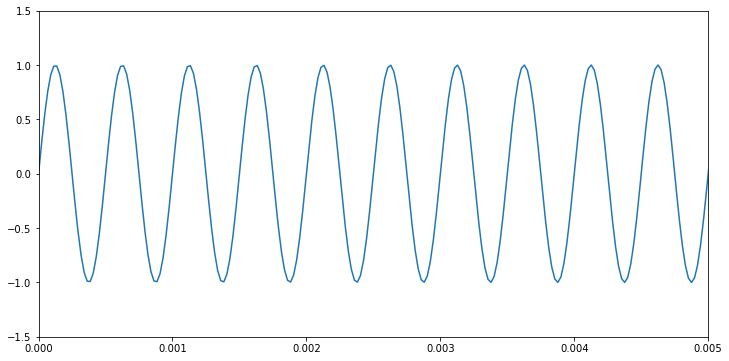

In [304]:
#---------------------------
# Importation des librairies
#---------------------------
import numpy as np
import matplotlib.pyplot as plt
#---------------------------
# Emettre une sinusoïde
#---------------------------
fs = 44100 # Fréquence d'échantillonnage (nombre d'échantillons par unité de temps)
n  = np.arange(0,10,1/fs) # n est un array qui représente l'intervalle de temps de notre fonction sinusoïdale de 0 à 10 avec comme espacement 1/fs entre les valeurs ce qui représente le temps T car **1/f = T**
f  = 2000  # Fréquence en hertz
x = np.sin(2*np.pi*f*n) # Fonction sinusoïdale
#---------------------------
sd.play(x,fs) # Jouer la sinusoïde
#---------------------------
# Notre figure
#---------------------------
fig = plt.figure(figsize=(12, 6)) # Régler la taille de la figure
ax = plt.axes() # Tracer la figure

plt.xlim(0,0.005) # Limite de l'axe des abscisses de 0 à 0.005
plt.ylim(-1.5,1.5) # Limite de l'axe des ordonnées de -1.5 à 1.5

ax.plot(n,x) # Tracer ma figure de n et x

### <span style="color:red">2-3) PC récepteur : Écrire un programme pour la réception et la visualition du signal sinusoïdal.</span>

Ce programme sera sur le PC récepteur et sera lancé juste après le programme du PC émetteur.</br>
Il va nous permettre de capturer le son émis du PC émetteur afin de tracer une courbe sinusoïdale.

**Nous avons effectué des test pour avoir une courbe sinusoïdale et réglé la barre de son du PC à 36 afin d'avoir une courbe sinusoïdale.**

Commencez à enregistrer
Fin de l'enregistrement


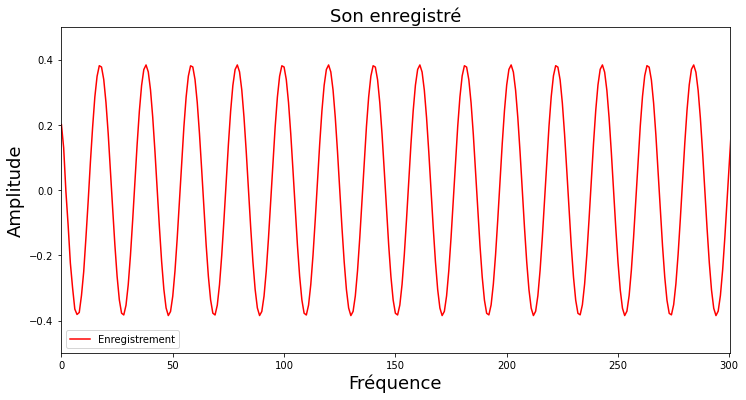

In [300]:
#-------------------------------------
# Les librairies
#-------------------------------------
import sounddevice as sd
import matplotlib.pyplot as plt
#-------------------------------------

# Fermer toutes les figures ouvertes à partir d'un script
plt.close('all')

#-------------------------------------
# Détails pour l'enregistrement du son
#-------------------------------------

fs = 44100 #fréquence d'échantillonage
T = 3 #secondes

#-------------------------------------
# Enregistrement
#-------------------------------------

print("Commencez à enregistrer")

# pour enregistrer de l'audio à partir du channel 1
# l'appareil de son dans un Numpy
recording = sd.rec(int(T * fs), fs, channels=1, blocking='True')

print("Fin de l'enregistrement")

# Jouer la sinusoïde
sd.play(recording, fs)

#-------------------------------------
# Notre Figure
#-------------------------------------
x = recording # l'enregistrement sur l'axe des abscisses
y = fs # l'enregistrement sur l'axe des ordonnées

fig = plt.figure(figsize=(12, 6)) # Régler la taille de la figure
plt.xlim(x.min()-0.005, x.max()+300) # Limite minimale et maximale de l'axe des abscisses
plt.ylim(-0.5, 0.5) # Limite minimale et maximale de l'axe des ordonnées

# Tracer notre enregistrement de couleur rouge avec comme titre "Son enregistré" de police 18
# Créers les titres Apmlitude et Fréquence pour l'axe Y et X de taille 18
# Créer une légende
plt.plot(recording, color="red", label="Enregistrement"); plt.title('Son enregistré', fontsize = 18); plt.xlabel("Fréquence", fontsize = 18); plt.ylabel("Amplitude", fontsize = 18)
plt.legend(loc='lower left')

### <span style="color:red">4-5-6) Écrire un programme pour implémenter un algorithme qui calcule la fréquence et l'amplitude max </span>

Notre algorithme va devoir calculer la fréquence.

Pour ce faire :  

   - A chaque fois que notre courbe passera du **positif** au **négatif**, notre algorithme comptera cela comme une **periode**.
   - Après cela, **renverra** le nombre de periodes **divisées** par le nombre de **secondes totales** pour avoir la **fréquence**.
   - Pour avoir l'amplitude, nous aurons besoin de **trouver** l'écart entre nos deux périodes et les divisés par 2 pour avoir l'amplitude **positive**.


#### <span style="color:red">A) Partie du PC émetteur </span>


**Nous avons tracé notre figure pour voir la différence entre l'envoie du signal et la réception**. </br>
Cela nous permet de mieux visualiser le rendu.

La fréquence de cette fonction sinusoidale est de 2000.0 Hz et il y a une amplitude max de 0.9926695136611634 


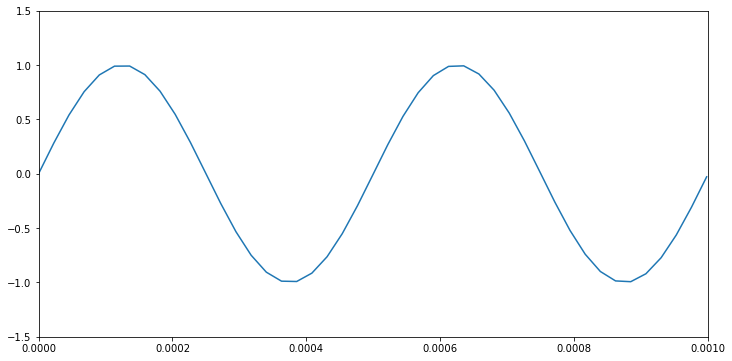

In [137]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt

#-------------------------------------------
# Emettre la sinusoïde
#--------------------------------------------
itmps = 0.001
fs = 44100 # Fréquence d'échantillonnage (nombre d'échantillons par unité de temps)
n  = np.arange(0,itmps,1/fs) #  est un array qui représente l'intervalle de temps de notre fonction sinusoïdale de 0 au temps donné avec comme espacement 1/fs entre les valeurs ce qui représente le temps T car **1/f = T**
f  = 2000  # Fréquence en hertz
x = np.sin(2*np.pi*f*n) # Fonction sinusoïdale
#--------------------------------------------
sd.play(x,fs) # Jouer la sinusoïde
#--------------------------------------------
# Notre figure
#--------------------------------------------
fig = plt.figure(figsize=(12, 6)) # Régler la taille de la figure
ax = plt.axes() # Tracer la figure

plt.xlim(0,itmps) # Limite de l'axe des abscisses de 0 à 0.005
plt.ylim(-1.5,1.5) # Limite de l'axe des ordonnées de -1.5 à 1.5

ax.plot(n,x) # Tracer ma figure de n et x



#--------------------------------------------
# Notre algorithme pour calculer la fréquence
#--------------------------------------------

def amplitude(ar) : # Création de ma fonction amplitude et de cet array car notre fonction globale est sur un array
    return( (np.max(ar) - np.min(ar))/2) # Retourner la comparaison entre notre array max moins notre array minimum.
# Il s'agit donc de l'écart entre les valeurs extrêmes d'une grandeur.
      

def calculfreq(ar) : # Création de ma fonction calculfreq
    maxi = 0 # création de ma variable maxi à 0
    for i in range(len(ar)-1): # création de ma condition **for** pour i dans la range ou l'on commence à 0 et l'on s'arrête à la fin de mon tableau. |  len va renvoyer le nombre des éléments de mon array
        if ar[i]> 0 and ar[i+1] <  0 : # création de ma condition **if** qui permet d'ajouter 1 à maxi si la courbe est positive et négative quand on y ajoute 1 : si ce qu'il y'a dans le array (représenté par i) est plus grand que 0 et que le array (représenté par i+1) est inférieur à 0, alors maxi = maxi + 1
            maxi = maxi+1 # on ajoute 1 à notre variable maxi
    return(maxi/itmps) # On retourne la variable maxi divisé par le temps pour nous donner la fréquence

calculfrequence = calculfreq(x) # On initialise une nouvelle variable calculfrequence pour y ajouter notre fonction **calculfreq**
amplitude = amplitude(x) # On initialise une nouvelle variable amplitude qui est égal à calculfrequence * le temps (cela nous donne les amplitudes)

#--------------------------------------------
# Phrase finale
#--------------------------------------------

print(f'La fréquence de cette fonction sinusoidale est de {calculfrequence} Hz et il y a une amplitude max de {amplitude} ')


#### <span style="color:red">B) Partie pratique du PC récepteur</span>

Commencez à enregistrer
Fin de l'enregistrement
La fréquence de cette fonction sinusoidale est de 2000.0 hz et il y a une amplitude max de 0.385650634765625


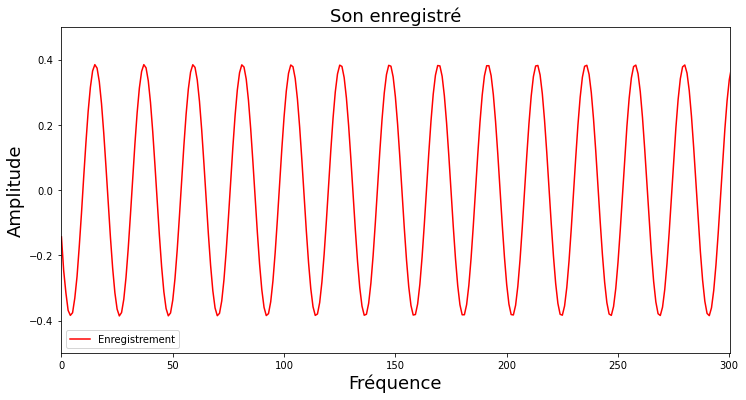

In [332]:

#--------------------------------------------

# Fermer toutes les figures ouvertes à partir d'un script
plt.close('all')

#--------------------------------------------
# Détails pour l'enregistrement du son
#--------------------------------------------

fs = 44100 #fréquence d'échantillonage
T = 3 #secondes

#--------------------------------------------
# Enregistrement
#--------------------------------------------

print("Commencez à enregistrer")

# pour enregistrer de l'audio à partir du channel 1
# l'appareil de son dans un Numpy
recording = sd.rec(int(T * fs), fs, channels=1, blocking='True')

print("Fin de l'enregistrement")
#--------------------------------------------
# Jouer la sinusoïde
sd.play(recording, fs)
#--------------------------------------------

#--------------------------------------------
# Notre Figure
#--------------------------------------------
x = recording # l'enregistrement sur l'axe des abscisses
y = fs # l'enregistrement sur l'axe des ordonnées

fig = plt.figure(figsize=(12, 6)) # Régler la taille de la figure
plt.xlim(x.min()-0.005, x.max()+300) # Limite minimale et maximale de l'axe des abscisses
plt.ylim(-0.5, 0.5) # Limite minimale et maximale de l'axe des ordonnées

# Tracer notre enregistrement de couleur rouge avec comme titre "Son enregistré" de police 18
# Créers les titres Apmlitude et Fréquence pour l'axe Y et X de taille 18
# Créer une légende
plt.plot(recording, color="red", label="Enregistrement"); plt.title('Son enregistré', fontsize = 18); plt.xlabel("Fréquence", fontsize = 18); plt.ylabel("Amplitude", fontsize = 18)
plt.legend(loc='lower left')

#--------------------------------------------
# Notre algorithme pour calculer la fréquence
#--------------------------------------------
itmps = T # déinir ma variable itmps qui est égal à ma variable T(temps)

def amplitude(ar) : # Création de ma fonction amplitude et de cet array car notre fonction globale est sur un array
    return( (np.max(ar) - np.min(ar))/2) # Retourner la comparaison entre notre array max moins notre array minimum et diviser par 2 ( car pic à pic).
# Il s'agit donc de l'écart entre les valeurs extrêmes d'une grandeur.
      

def calculfreq(ar) : # Création de ma fonction calculfreq
    maxi = 0 # création de ma variable maxi à 0
    for i in range(len(ar)-1): # création de ma condition **for** pour i dans la range ou l'on commence à 0 et l'on s'arrête à la fin de mon tableau. |  len va renvoyer le nombre des éléments de mon array mais je met -1 sinon cela va me créer des erreurs "index" car on sort du tableau
        if ar[i]< 0 and ar[i+1] >0 : # création de ma condition **if** qui permet d'ajouter 1 à maxi si la fonction change de signe du - vers + 
            maxi = maxi+1 # on ajoute 1 à notre variable maxi
    return(maxi/itmps) # On retourne la variable maxi divisé par le temps pour nous donner la fréquence

calculfrequence = calculfreq(x) # On initialise une nouvelle variable calculfrequence pour y ajouter notre fonction **calculfreq**
amplitude = amplitude(x) # On initialise une nouvelle variable amplitude qui est égal à calculfrequence * le temps (cela nous donne les amplitudes)

#--------------------------------------------
# Phrase finale
#--------------------------------------------

print(f'La fréquence de cette fonction sinusoidale est de {calculfrequence} hz et il y a une amplitude max de {amplitude}')

# Remettre nos compteurs au cas ou.
amplitude = 0
calculfrequence = 0 

Nous pouvons apercevoir que la partie théorique et pratique n'est pas exactement pareil au niveau des **amplitudes**.</br>
Cela s'explique par des **pertes** lors de l'enregistrement. </br>
Nous avons vu que notre programme récepteur **n'affichait pas correctement** les courbes sinusoïdales si on ne réglait pas **correctement** la barre de son micro du pc.

# <span style="color:darkgreen">Chapitre 2 : Mesures, tracés, et définitions</span>

<span style="color:red">**Déroulement du chapitre:**</span>
<div class="alert alert-block alert-info bilan">

Dans un deuxième temps, nous allons étudier une partie un peu plus théorique, la **fréquence de coupure** pour nôtre système.
</div>

### <span style="color:red">1) Plage de fréquences des signaux audio. </span>

<span style="color:red">Définition :</span> *Une plage de fréquences est une aire dans laquelle des ondes, des fréquences sont envoyées et reçues. </br>
Chaque plage ainsi définie représente un spectre de fréquences, par analogie avec le spectre de la lumière visible. </br>
La plage de fréquence peut aller de 20Hz à 20KHz.*

Nous allons choisir 12 valeurs de fréquences pour effectuer la mesure de la réponse en fréquence des cartes son : </br>

20Hz, 100Hz, 250Hz, 500Hz, 750Hz, 1KHz, 1.5KHz, 2KHz, 2.5KHz, 5KHz, 10KHz, 15KHz, 20KHz


### <span style="color:red">2) Effectuer la mesure de la réponse en fréquence des cartes son sur le PC émetteur et récepteur. </span>


#### Pour 1.5KHz on obtient :

Commencez à enregistrer
Fin de l'enregistrement
La fréquence de cette fonction sinusoidale est de 14999.666666666666 hz et il y a une amplitude max de 0.4444122314453125


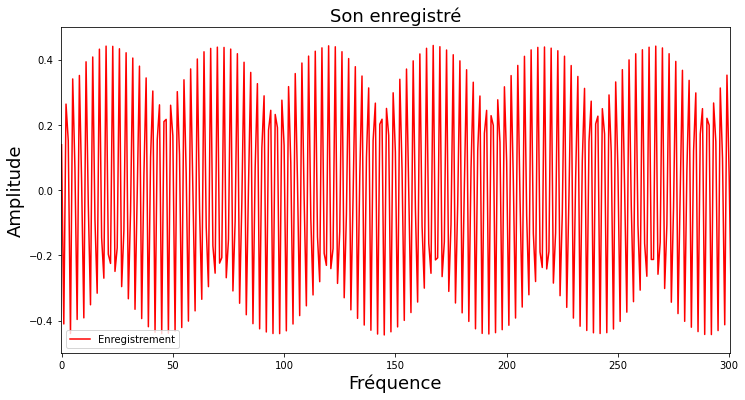

In [413]:

#--------------------------------------------

# Fermer toutes les figures ouvertes à partir d'un script
plt.close('all')

#--------------------------------------------
# Détails pour l'enregistrement du son
#--------------------------------------------

fs = 44100 #fréquence d'échantillonage
T = 3 #secondes

#--------------------------------------------
# Enregistrement
#--------------------------------------------

print("Commencez à enregistrer")

# pour enregistrer de l'audio à partir du channel 1
# l'appareil de son dans un Numpy
recording = sd.rec(int(T * fs), fs, channels=1, blocking='True')

print("Fin de l'enregistrement")

# Jouer la sinusoïde
sd.play(recording, fs)

#--------------------------------------------
# Notre Figure
#--------------------------------------------
x = recording # l'enregistrement sur l'axe des abscisses
y = fs # l'enregistrement sur l'axe des ordonnées

fig = plt.figure(figsize=(12, 6)) # Régler la taille de la figure
plt.xlim(x.min()-0.005, x.max()+300) # Limite minimale et maximale de l'axe des abscisses
plt.ylim(-0.5, 0.5) # Limite minimale et maximale de l'axe des ordonnées

# Tracer notre enregistrement de couleur rouge avec comme titre "Son enregistré" de police 18
# Créers les titres Apmlitude et Fréquence pour l'axe Y et X de taille 18
# Créer une légende
plt.plot(recording, color="red", label="Enregistrement"); plt.title('Son enregistré', fontsize = 18); plt.xlabel("Fréquence", fontsize = 18); plt.ylabel("Amplitude", fontsize = 18)
plt.legend(loc='lower left')

#--------------------------------------------
# Notre algorithme pour calculer la fréquence
#--------------------------------------------
itmps = T

def amplitude(ar) : # Création de ma fonction amplitude et de cet array car notre fonction globale est sur un array
    return( (np.max(ar) - np.min(ar))/2) # Retourner la comparaison entre notre array max moins notre array minimum et diviser par 2 ( car pic à pic).
# Il s'agit donc de l'écart entre les valeurs extrêmes d'une grandeur.
      

def calculfreq(ar) : # Création de ma fonction calculfreq
    maxi = 0 # création de ma variable maxi à 0
    for i in range(len(ar)-1): # création de ma condition **for** pour i dans la range ou l'on commence à 0 et l'on s'arrête à la fin de mon tableau. |  len va renvoyer le nombre des éléments de mon array mais je met -1 sinon cela va me créer des erreurs "index" car on sort du tableau
        if ar[i]< 0 and ar[i+1] >0 : # création de ma condition **if** qui permet d'ajouter 1 à maxi si la fonction change de signe du - vers + 
            maxi = maxi+1 # on ajoute 1 à notre variable maxi
    return(maxi/itmps) # On retourne la variable maxi divisé par le temps pour nous donner la fréquence

calculfrequence = calculfreq(x) # On initialise une nouvelle variable calculfrequence pour y ajouter notre fonction **calculfreq**
amplitude = amplitude(x) # On initialise une nouvelle variable amplitude qui est égal à calculfrequence * le temps (cela nous donne les amplitudes)

#--------------------------------------------
# Phrase finale
#--------------------------------------------

print(f'La fréquence de cette fonction sinusoidale est de {calculfrequence} hz et il y a une amplitude max de {amplitude}')

# Remettre nos compteurs au cas ou.
amplitude = 0
calculfrequence = 0 

Pour que ce soit plus **lisible**, nous allons effectuer les tests avec le même programme émetteur et récepteur et mettre que cet exemple pour éviter une surcharge. Nous allons écrire tout nos résultats à la suite :

- 20Hz = 0.09V 
- 100Hz = 0.30 V
- 250Hz = 0.31 V
- 500Hz = 0.35 V
- 750Hz = 0.37 V
- 1KHz = 0.39 V
- 1.5KHz = 0.40 V
- 2KHz = 0.38 V
- 2.5KHz = 0.47 V
- 5KHz = 0.45 V
- 10KHz = 0.37 V
- 15KHz = 0.44 V
- 20 KHz = 0.27V

### <span style="color:red">3) Tracer le résultat avec le gain en dB et avec une échelle en fréquence linéaire et semi-log </span>

Nous allons créer nos deux figures. Nous aurons besoin de `numpy` qui est une bibliothèque Python utilisée pour travailler avec des tableaux. </br>
Nous utiliserons via cette bibliothèque la variable sépciale `array`et ces tableaux qui peuvent contenir plusieurs valeurs à la fois. </br>
Enfin, nous aurons besoin de `matplotlib`pour faire les figures graphiques.

La fréquence de coupure est de : 0.33229


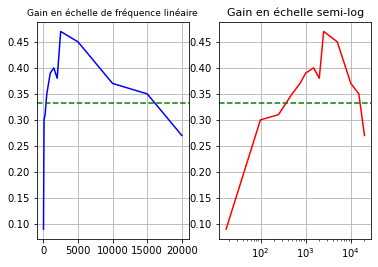

In [136]:
import numpy as np
import matplotlib.pyplot as plt
#----------
# Nos Array
#----------

# Array de mes amplitudes reçues
amprec = np.array([0.09, 0.30, 0.31, 0.35, 0.37, 0.39, 0.40, 0.38, 0.47, 0.45, 0.37, 0.35, 0.27 ])
# Array de mes fréquences reçues
freqrec = np.array([17.3, 99.6, 249.3, 499.3, 749.6, 999.6, 1499.6, 1999.6, 2500, 5000, 10000, 15000, 20000])
# Array de mes fréquences émises
freqem = np.array([20, 100, 250, 500, 750, 1000, 1500, 2000, 2500, 5000, 10000, 15000, 20000])
# Array de mon amplitude émise
ampem = np.array([1])  

#-------------
# Nos formules
#-------------
A = amprec/ampem # Formule de l'atténuation 
freqcoup = (np.max(amprec)) * 0.707  # fréquence de coupure. 70.7% de l'amplitude max reçue. Si on convertit on obtiens 0.707
#-------------
#
#-------------
plt.subplot(1,2,1) # Dessiner plusieurs figures
plt.title("Gain en échelle de fréquence linéaire", fontsize="9") # Titre
plt.plot(freqem, A, color="blue") # création de mon échelle de fréquence linéaire
plt.axhline(freqcoup, color="green", label="Fréquence de coupure", linestyle="dashed") # c'est la fréquence qui limite de fonctionnement utile d'un circuit électronique
plt.grid(True) # grillage

plt.subplot(1,2,2) # Dessiner plusieurs figures
plt.title("Gain en échelle semi-log", fontsize="11") # Titre
plt.semilogx(freqrec, A, color="red") # création de mon échelle semi-log
plt.axhline(freqcoup, color="green", label="Fréquence de coupure", linestyle="dashed") # c'est la fréquence qui limite de fonctionnement utile d'un circuit électronique
plt.grid(True) # grillage


print(f"La fréquence de coupure est de : {freqcoup}")






**La fréquence de coupure pour le PC Récepteur est de <span style="color:red"> 1kHZ à 17kHZ**</span>


### Pourquoi nous utilisons la fonction *semi-log* ?

Nous utilisons ***semi-log*** car les **décibels** sont une **échelle logarithmique** qui est calculé en fonction d'une intensité sonore.</br>
Et, lorsqu'on **multiplie par deux l'intensité sonore**, on **augmente** seulement **de 3dB**.</br>
Voilà pourquoi on utilise une échelle logarithmique.</br>
Sinon, cela serait "disproportionné".

**Remarque** : Nous remarquons aussi que la fréquence de coupure coupe au deuxième point pour la ***fréquence linéaire*** et au premier point pour le ***semi-log***. Nous ne savons pas encore ce que cela représente.

### <span style="color:red">4) Définition de fréquence à -3dB et précisions sur fréquences de coupure pour ce système. </span>



<span style="color:red">Définition :</span> La fréquence de coupure est la fréquence pour laquelle le **signal de sortie est atténué de -10log10 dB (environ -3dB)**, c'est-à-dire que son amplitude est **réduite** d'un facteur et tombe à à peu près 71% de l'amplitude du signal d'entrée (et, à courant équivalent, la puissance est par conséquent réduite de moitié).

*Donc, la fréquence de coupure est 70.7% de notre amplitude max reçue. Nous faisons dans notre programme Hmax * 0.707 pour avoir cette fréquence de coupure.</br>
Ce qui revient à faire : Fréquence de coupure = Hmax / √2*

# <span style="color:darkgreen">Chapitre 3 : Études précises des mesures</span>





<span style="color:red">**Déroulement du chapitre:**</span>
<div class="alert alert-block alert-info bilan">

Nous allons nous intéresser à la **précision** de la mesure de l'amplitude.</br>

Nous étudierons les cas les plus **extrêmes** : à savoir lorsque nous avons un cas le plus **favorable**, où nous savons l'amplitude de manière parfaite, et le cas le plus **défavorable**, lorsque l'échantillion est le plus éloigné.

Le problème de n'avoir pas beaucoup d'échantillons est le fait que la **précision** n'est pas.</br>
Effectivement, la hauteur max ne peut ne pas être atteint en ayant de trop gros **écarts** et donc, **fausse** les résultats. 

Un cas **favorable** à alors une marge d'erreur de 0.</br>
Tandis que le cas **défavorable** à une marge d'erreurs.
</div>

### <span style="color:red">1) Dessin du signal pour le cas le plus favorable et défavorable</span>



#### A) Nous allons commencer par le dessin du cas le plus favorable et le plus défavorable :

<img src="https://i.imgur.com/3v8Nr8Y.jpg" align=center style="width: 500px;">



Nous allons utilisé la fonction ***stem*** qui permet de dessiner des lignes perpendiculaires à une ligne de base à chaque emplacement ***locs*** de la ligne de base aux ***heads***, et y place un marqueur.


#### B) Cas le plus favorable

Le cas le plus favorable se produit si l'échantillon atteint la valeur maximale indiquée comme dans la figure ci-dessous.</br>
L'erreur de mesure est alors nulle.

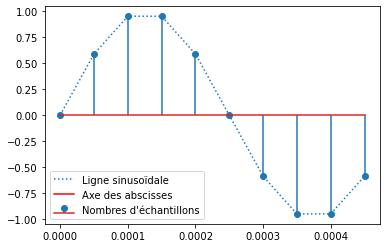

In [131]:
#---------------------------
# Importation des librairies
#---------------------------
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
#-------------------------------
# Nos variables 
#-------------------------------

# Création de notre variable fréquence : fo
fo = 2000
# Variable "to" pour le temps
to = 1/fo
# Variable n pour le nombres d'échantillons qu'il y'aura dans la sinusoïdale
n = 10

# Variable de fréquence d'échantillonnage
fech = n*fo # la formule nous ait donnée dans le document de cadrage, c'est le nombres d'échantillion x de nôtre fréquence
tech = 1/fech # le temps d'échantillonnage, donc 1/fréquence d'échantillonnage

t = np.arange(0,to,tech) # le temps va de 0 jusqu'au temps max et il se déplace en fonction de nôtre temps d'échantillonage
x = np.arange(0,to) # x va de 0 jusqu'au temps max.

sinus=np.sin(2*np.pi*fo*t) # notre fonction sinusoïdale principale pour le nombres d'échantillons
sinus1=np.sin(2*np.pi*fo*x) # fonction sinusoïdale secondaire pour tracer notre repère des abscisses (afin de bien voir notre axe)


#-------------------------------
# Nôtre figure 
#-------------------------------

# Création du graphique et des tracés
plt.plot(t,sinus, ':', label="Ligne sinusoïdale") # Permet de visualiser la courbe sinusoïdale par rapport aux échantillons
plt.stem(t,sinus, label="Nombres d'échantillons") # Stem pour tracer des lignes perpendiculaires type diagramme pour afficher 'n' échantillons
plt.plot(x, sinus1, color="red", label="Axe des abscisses") # Tracé rouge afin de voir notre axe des abscisses.

plt.legend(loc='lower left') # Créer une légende
#-------------------------------


Dans ce cas, nous savons que **A1** = A$ \times \sin(\frac{\pi}{2}$) et que $\sin(x) = A\times\sin(2\times\pi\times f+\phi)$

puisque  $\sin$($\frac{\pi}{2}$) = **1**     on le remplace et on obtient  **A1 = A**

#### C) Cas le plus défavorable

Le cas le plus défavorable se produit si les échantillons arrivent symétriquement au point considéré comme le maximum comme le montre la figure ci-dessous. </br>
Il y a alors une erreur de mesure.

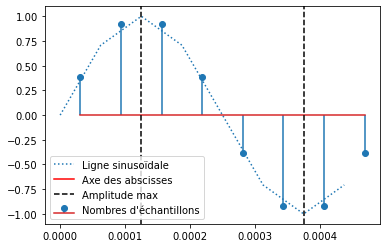

In [132]:
#---------------------------
# Importation des librairies
#---------------------------
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
#-------------------------------
# Nos variables 
#-------------------------------

# Création de notre variable fréquence : fo
fo = 2000
# Variable "to" pour le temps
to = 1/fo
# Variable n pour le nombres d'échantillons qu'il y'aura dans la sinusoïdale
n = 8

# Variable de fréquence d'échantillonnage
fech = n*fo # la formule nous ait donnée dans le document de cadrage, c'est le nombres d'échantillion x de nôtre fréquence
tech = 1/fech # le temps d'échantillonnage, donc 1/fréquence d'échantillonnage

t = np.arange(0,to,tech) # le temps va de 0 jusqu'au temps max et il se déplace en fonction de nôtre temps d'échantillonage
sinus=np.sin(2*np.pi*fo*t) # notre fonction sinusoïdale principale

tx = np.arange(tech/2,to,tech) # tech est divisé par 2 pour décaler les points d'échantillons (décalé par la moitié et ainsi 
# obtenir le cas le plus défavorable
sinustx=np.sin(2*np.pi*fo*tx) # fonction sinusoïdale pour le nombres d'échantillons

sinus1=np.sin(2*np.pi*fo*x) # fonction sinusoïdale secondaire pour tracer notre repère des abscisses (afin de bien voir notre axe)

#-------------------------------
# Nôtre figure 
#-------------------------------

# Création du graphique et des tracés
plt.plot(t,sinus, ':', label="Ligne sinusoïdale") # Permet de visualiser la courbe sinusoïdale par rapport aux échantillons
plt.stem(tx,sinustx, label="Nombres d'échantillons") # Stem pour tracer des lignes perpendiculaires type diagramme pour afficher 'n' échantillons
plt.plot(x, sinus1, color="red", label="Axe des abscisses") # Tracé rouge afin de voir notre axe des abscisses.

plt.axvline(x=0.000125,linestyle = '--', color='black', label="Amplitude max") # création de mes pointillés pour visualiser
#l'amplitude max
plt.axvline(x=0.000375,linestyle = '--', color='black')

plt.legend(loc='lower left') # Créer une légende
#-------------------------------


Dans le cas le plus defavorable on a:
   
   1. La valeur maximale de la sinusoide est toujours  **A0 = sin($\frac{\pi}{2}$)**
   
   2.la valeur de l'échantillon maximal mesuré est décale d'un angle de $\frac{\pi}{N}$
     
  l'échantillon vaut alors : **A1=A0=sin($\frac{\pi}{2}$+$\frac{\pi}{N}$)**
      
    
   3. On  utilise la formule trigonomtrique de l'addition ---->  **sin(a+b)=sin(a)cos(b)+cos(a)sin(b)**
   
       
 <center> $\sin(a+b)$ = $\sin(\frac{\pi}{2}+\frac{\pi}{N}$)

### <span style="color:red">2) Déduire l’erreur de mesure d’amplitude en % pour le cas le plus défavorable en fonction de N.</span>

Nous allons effectuer une application numérique dans les 2 cas suivants :
- A. Sinusoïde de fréquence 1KHz et une fréquence d’échantillonnage de 192KHz
- B. Sinusoïde de fréquence 20KHz et une fréquence d’échantillonnage de 192KHz

Nous allons utiliser deux formules pour réussir à trouver cette erreur en % :

- N = $\frac{fech}{fo}$
- $\ (sin(\frac{\pi}{2}+\frac{\pi}{N})-1) * 100 $

1. A) Pour la sinusoïde de fréquence 1KHz et une fréquence d’échantillonnage de 192KHz, nous allons commencer par trouver N en fonction de la fréquence et de la fréquence d'échantillonnage donné :

N = $\frac{fech}{fo}$ | N = $\frac{192}{1}$ | N = 192 KHz

2. Une fois que nous avons trouvé N, nous allons devoir utiliser la formule de l'écart en pourcentage :

$\ |(sin(\frac{\pi}{2}+\frac{\pi}{N})-1)| * 100 $ </br> $\ |(sin(\frac{\pi}{2}+\frac{\pi}{192})-1)| * 100 $  </br> $\ |(sin(\frac{\pi}{2}+\frac{\pi}{192})-1)| * 100 $  **~= 0.013 %** 

<span style="color:red"> Il y'a donc environ 0.013% de marge erreur pour l'amplitude pour la sinusoïde de fréquence 1KHz et une fréquence d’échantillonnage de 192KHz</span>

<img src="http://www.reponsesbio.com/wp-content/uploads/2015/04/separateur8.png" align=center style="width: 800px;">

1. B) Pour la sinusoïde de fréquence 20KHz et une fréquence d’échantillonnage de 192KHz, nous allons commencer par trouver N en fonction de la fréquence et de la fréquence d'échantillonnage donné :

N = $\frac{fech}{fo}$ | N = $\frac{192}{20}$ | N = 9.6 KHz

2. Une fois que nous avons trouvé N, nous allons devoir utiliser la formule de l'écart en pourcentage :

*Nous allons utiliser la valeur absolue pour renvoyer un nombre positif*

$\ |(sin(\frac{\pi}{2}+\frac{\pi}{N})-1)| * 100 $ </br> $\ |(sin(\frac{\pi}{2}+\frac{\pi}{9.6})-1)| * 100 $  </br> $\ |(sin(\frac{\pi}{2}+\frac{\pi}{9.6})-1)| * 100 $  **~= 5.3 %** 

<span style="color:red"> Il y'a donc environ 5.3% de marge erreur pour l'amplitude pour la sinusoïde de fréquence 20KHz et une fréquence d’échantillonnage de 192KHz</span>

***Récapitulatif*** :

1. On nous donne la fréquence
2. On nous donne la fréquence d'échantillonnage
3. On cherche N grâce à ces deux valeurs car nous n'avons pas N sachant que l’erreur de mesure d’amplitude en % pour le cas le plus défavorable est en fonction de N. 
4. Grâce à la formule de l'écart en pourcentage, nous obtenons la marge d'erreur pour l'amplitude pour la sinusoïde de fréquence 1KHz et 20KHz et une fréquence d’échantillonnage de 192KHz

<img src="https://www.consultancy.nl/profile/media/conclusion-spotlight-2018-05-17-123251893.png" align=center style="width: 400px;">

Nous n'avons malheureusement pas eu le temps de finir sachant que nous sommes un peu plus long mais nous l'aurions fini.</br>
Nous avons préférés terminer par le 2. du chapitre 3 pour finaliser le notebook et le paufiner pour qu'il soit agréable et intuitif à lire.</br>
Nous avons fais le maximum pour détailler et expliquer que ce soit les programmes, les calculs, nos méthodes, nos chapitres, ...</br>


**Notre SAE se résume par le fait que :**
- Nous avons bien mesuré la réponse en fréquence d'un sytème de transmission entre 2 PC via les cartes son
- Nous avons bien mesuré la fréquence et l'amplitude de la sinusoïde reçue sur le PC récepteur
- Nous avons bien mesuré manuellement la réponse en fréquence des cartes son
- Nous avons bien tracé le résultat de notre mesure
- Nous avons bien fait les dessins et tracés du signal pour le cas le plus favorable et défavorable
- Nous avons bien déduis l'erreur de mesure d'amplitude en % de nos 2 sinusoïdes différentes
<img src="http://www.pngmart.com/files/7/Check-Background-PNG.png" align=right style="width: 50px;"></img>

**Ce que nous n'avons pas terminés dans le dernier chapitre:**

- Faire un dessin en indiquant la durée de mesure la plus favorable et le cas le plus défavorable pour la mesure de fréquence.
- Indiquer la fréquence maximale que nous pouvons trouver pour la durée de mesure à 10KHz.
- Indiquer la problématique sur la précision de la mesure de fréquence si le signal est bruité. 
- Indiquer quel élément peut être utilisé pour régler ce problème et expliquer le fonctionnement de cet élément
<img src="http://sweetclipart.com/multisite/sweetclipart/files/x_mark_red.png" align=right style="width: 50px;"></img>

